# Convolutional Neural Networks (CNN)

- Convolutional neural networks leverage spatial information, making them good for classifying images.

## Deep Convolutional Neural networks

- Deep Convolutional Neural Network (DCNN) consists of man neural network layers.

### local receptive fields

- To perserve spatial information of an image, it is often convenient to represent each image with a matrix of pixels.
- Ti accinokusg a sunoke wat ti accinokusg us ti ebcide tge kycal structure into a submatrix of adjacent input neurons.

### Shared weights and bias
### A mathematical example
### ConvNets in TensorFlow

- Add convolutional layer with 32 parallel features and filter

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

2024-07-02 02:35:23.249993: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 02:35:23.250018: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 02:35:23.250714: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-02 02:35:23.256077: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-02 02:35:24.955112: E external/local_xla/xla/

### Pooling layers
- Summarize the output of a feature map.

### Max pooling
- Max pooling operator, it outputs the maximum activation as observed in the region

In [3]:
model.add(layers.MaxPooling2D((2, 2)))

### Average pooling
- Another choice is to aggregate the region into the average of the values.

### An example of DCNN: LeNet
- Another example of the MNIST dataset, but using convolution.  LeNet has lower layers alternating convolution operations with max-pooling operations.

In [8]:
## to define a LeNet, we will use layers.Convolution2D.
##     where the first parameter is the number of output filters, and the next
##     tuble is the extension for each filter.

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

# network and training
EPOCHS = 5
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = tf.keras.optimizers.Adam()
VALIDATION_SPLIT = 0.90

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
NB_CLASSES = 10 # number of output = number of digits

## Define the LeNet network
class LeNet:
    def build(input_shape, classes):
        model = models.Sequential()
    
        ## Max pooling implements a sliding window, over the layer and takes maximum
        # CONV => RELU => POOL
        model.add(layers.Convolution2D(50, (5, 5), activation='relu',
                                      input_shape=input_shape))
        model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
        ##Add second convolution stage
        # CONV => RELU => POOL
        model.add(layers.Convolution2D(50, (5, 5), activation='relu'))
        model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
        ## Flatten and run a standard dense network
        # Flatten => RELU Layers
        model.add(layers.Flatten())
        model.add(layers.Dense(500, activation='relu'))
        # a softmax classifier
        model.add(layers.Dense(classes, activation='softmax'))
        return model    

In [10]:
## Train the network
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# reshape
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

# cast
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# convert class vectors to binary class matices
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

# intalize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
              metrics=["accuracy"])
model.summary()

# I've had the damndest time getting tensorboard to work, skipping
#callbacks = [
#    # Write TensorBoard logs to './logs' directory
#    tf.keras.callbacks.TensorBoard(log_dir='./logs')
#]

# fit
history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE, epochs=EPOCHS,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
                    #callbacks=callbacks)
                   )

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score: ", score[0])
print("Test accuracy:", score[1])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 50)        1300      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 50)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 50)          62550     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 4, 4, 50)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 500)              

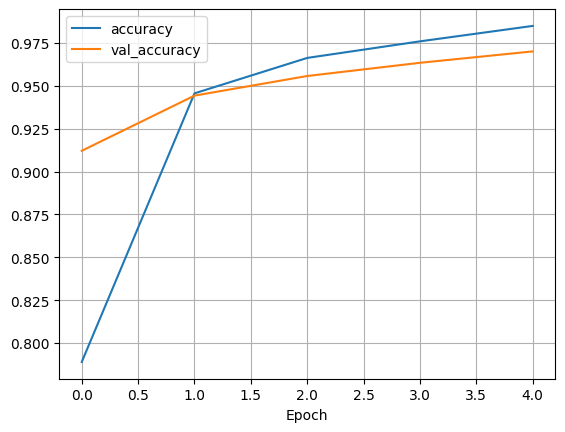

In [15]:
import matplotlib.pyplot as plt

#plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

### recognizing CIFAR-10 images with deep learning

- CIFAR-10 contains 60000 color images of 32*32 pixels in three channels.  Divided into 10 classes, with each class containing 6000 images.

In [24]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

# CIFAR_10 is a set of 60k images 32*32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

# Constants
BATCH_SIZE = 128
EPOCHS = 20
CLASSES = 10
BERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = tf.keras.optimizers.RMSprop()

- Out net will lear 32 convolutional filters, each of size 3*3.  The output dimension is the same as the input shape, so 32*32.

In [25]:
# defin the convnet
def build(input_shape, classes):
    model = models.Sequential()
    model.add(layers.Convolution2D(32, (3, 3), activation='relu',
            input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))
    # Deep pipline is a dense network with 512 units and ReLU activation
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(classes, activation='softmax'))
    return model

- Now train the model (parts of code not included into the book

In [26]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize the dataset
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert the y_train and y_test to categorical
y_train = tf.keras.utils.to_categorical(y_train, CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, CLASSES)

model = build((IMG_ROWS, IMG_COLS, IMG_CHANNELS), CLASSES)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 7200)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               3686912   
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                      

In [28]:
## Skipping the TensorBoard
#callbacks = [
#  # Write TensorBoard logs to `./logs` directory
#    tf.keras.callbacks.TensorBoard(log_dir='./logs')
#]

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIM,
              metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=VALIDATION_SPLIT,
          verbose=VERBOSE,
          #callbacks=callbacks)
         )
score = model.evaluate(X_test, y_test,
                       batch_size=BATCH_SIZE,
                       verbose=VERBOSE)

print('\nTest score: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/20


2024-07-03 04:34:52.256124: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


313/313 [==============================] - 16s 49ms/step - loss: 0.5302 - accuracy: 0.8180 - val_loss: 0.9606 - val_accuracy: 0.6818
Epoch 2/20
313/313 [==============================] - 15s 49ms/step - loss: 0.5066 - accuracy: 0.8253 - val_loss: 1.1103 - val_accuracy: 0.6712
Epoch 3/20
313/313 [==============================] - 15s 49ms/step - loss: 0.4907 - accuracy: 0.8299 - val_loss: 1.0468 - val_accuracy: 0.6872
Epoch 4/20
313/313 [==============================] - 16s 50ms/step - loss: 0.4648 - accuracy: 0.8394 - val_loss: 1.0722 - val_accuracy: 0.6796
Epoch 5/20
313/313 [==============================] - 15s 49ms/step - loss: 0.4462 - accuracy: 0.8457 - val_loss: 1.0726 - val_accuracy: 0.6763
Epoch 6/20
313/313 [==============================] - 16s 51ms/step - loss: 0.4333 - accuracy: 0.8506 - val_loss: 1.0706 - val_accuracy: 0.6852
Epoch 7/20
313/313 [==============================] - 16s 51ms/step - loss: 0.4164 - accuracy: 0.8557 - val_loss: 1.0799 - val_accuracy: 0.6852
Epo

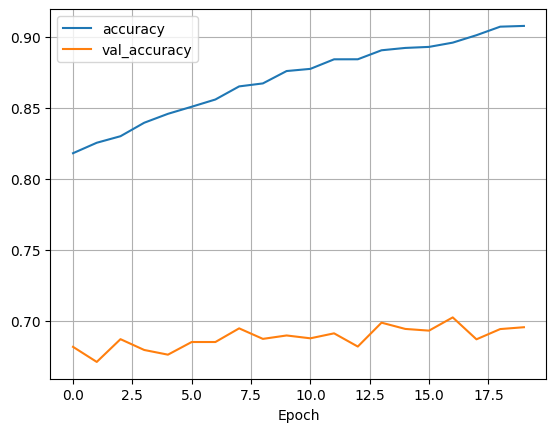

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

### Improving the CIFAR-10 performance with deeper network

- 1st module: (CONV+CONV+MaxPool+Droupout)
- 2nd module: (CONV+CONV+MaxPool+Droupout)
- 3rd module: (CONV+CONV+MaxPool+Droupout)

In [35]:
def build_model():
    model = models.Sequential()

    # 1st block
    model.add(layers.Conv2D(32, (3, 3), padding='same',
            input_shape=x_train.shape[1:],
            activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.2))

    # 2nd block
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.3))

    # 3rd block
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.4))

    # Dense
    model.add(layers.Flatten())
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

    return model

In [36]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

EPOCHS = 50
NUM_CLASSES = 10

def load_data():
    (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')

    # Normalize
    mean = np.mean(x_train, axis = (0, 1, 2, 3))
    std = np.std(x_train, axis=(0, 1, 2, 3))
    x_train = (x_train - mean) / (std + 1e-7)
    x_test = (x_test - mean) / (std + 1e-7)
    
    y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
    y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

    return x_train, y_train, x_test, y_test

Epoch 1/50


2024-07-03 04:51:22.080281: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


782/782 [==============================] - 107s 135ms/step - loss: 1.7202 - accuracy: 0.4840 - val_loss: 1.1634 - val_accuracy: 0.6143
Epoch 2/50
782/782 [==============================] - 114s 146ms/step - loss: 1.0767 - accuracy: 0.6546 - val_loss: 1.0221 - val_accuracy: 0.6630
Epoch 3/50
782/782 [==============================] - 115s 147ms/step - loss: 0.8716 - accuracy: 0.7123 - val_loss: 0.8915 - val_accuracy: 0.7108
Epoch 4/50
782/782 [==============================] - 114s 146ms/step - loss: 0.7422 - accuracy: 0.7476 - val_loss: 0.7022 - val_accuracy: 0.7639
Epoch 5/50
782/782 [==============================] - 113s 145ms/step - loss: 0.6576 - accuracy: 0.7769 - val_loss: 0.6943 - val_accuracy: 0.7640
Epoch 6/50
782/782 [==============================] - 113s 145ms/step - loss: 0.5923 - accuracy: 0.7958 - val_loss: 0.6588 - val_accuracy: 0.7866
Epoch 7/50
782/782 [==============================] - 114s 146ms/step - loss: 0.5503 - accuracy: 0.8118 - val_loss: 0.5845 - val_accura

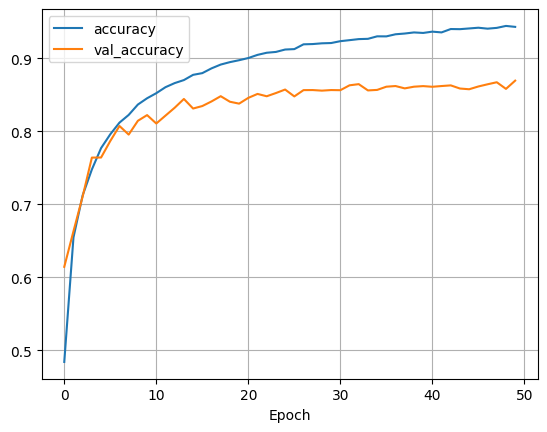

In [37]:
(x_train, y_train, x_test, y_test) = load_data()
model = build_model()

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'RMSprop',
              metrics = ['accuracy'])

# Train
batch_size = 64

history = model.fit(x_train, y_train, batch_size = batch_size,
          epochs = EPOCHS,
          validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size)

print('\nTest score: ', score[0])
print('Test accuracy: ', score[1])

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

### Improving the CIFAR-10 performance with data augentations

- We can improve our model by generating more images, take the training set and augment this set with multiple types of transformations

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# image augementation
datagen = ImageDataGenerator(
    rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True
)
datagen.fit(x_train)

In [42]:
import scipy

# train 
batch_size = 64
model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size),
                    epochs = EPOCHS,
                    verbose = 1, validation_data = (x_test, y_test))

# save to dist
model_json = model.to_json()
with open('./logs/model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('./logs/model.h5')

# test
scores = model.evaluate(x_test, y_test, batch_size = 128,
                        verbose = 1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100, scores[0]))

/tmp/ipykernel_106389/2473487061.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size),


NameError: name 'scipy' is not defined